In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
import skimage.external.tifffile as tiff

from resources.conv_learner import * # important because our ResNet name needs to override theirs
from resources.plots import *
from common import Statistics, dataset_source
from models import ResNet

In [3]:
DATA = '../datasets/yeast_v4.1'
data_path = Path(DATA)
SIZE = 200

In [4]:
classes = Statistics.source_class(data_path)

In [5]:
train_val = zip(classes['train'],classes['val'])
test = zip(classes['test'])

In [6]:
train_val_stats = Statistics.per_class(train_val)

working on: Cit1_MC_WT
working on: Cit1_MC_WT
working on: Cit1_MC_mfb1KO_mmr1KO
working on: Cit1_MC_mfb1KO_mmr1KO
working on: Cit1_MC_mfb1KO
working on: Cit1_MC_mfb1KO
working on: Cit1_MC_mmr1KO
working on: Cit1_MC_mmr1KO


In [7]:
train_val_stats

{'Cit1_MC_WT': (array([0.00797, 0.00483]), array([0.00076, 0.00153])),
 'Cit1_MC_mfb1KO_mmr1KO': (array([0.00789, 0.00471]),
  array([0.00072, 0.00152])),
 'Cit1_MC_mfb1KO': (array([0.00795, 0.00474]), array([0.00072, 0.00158])),
 'Cit1_MC_mmr1KO': (array([0.008  , 0.00472]), array([0.00075, 0.0016 ]))}

In [8]:
test_stats = Statistics.per_class(test)

working on: Cit1_MC_WT
working on: Cit1_MC_mfb1KO
working on: Cit1_MC_mmr1KO


In [9]:
test_stats

{'Cit1_MC_WT': (array([0.0211 , 0.00456]), array([0.00151, 0.00132])),
 'Cit1_MC_mfb1KO': (array([0.02112, 0.00447]), array([0.00145, 0.00144])),
 'Cit1_MC_mmr1KO': (array([0.02116, 0.00486]), array([0.00156, 0.00197]))}

In [10]:
lbls = {'Cit1_MC_WT': 0, 'Cit1_MC_mfb1KO': 1, 'Cit1_MC_mfb1KO_mmr1KO': 2, 'Cit1_MC_mmr1KO': 3}
train_val_stats = {lbls[key]:value for key, value in train_val_stats.items()}
test_stats = {lbls[key]:value for key, value in test_stats.items()} 

In [11]:
train_val_stats

{0: (array([0.00797, 0.00483]), array([0.00076, 0.00153])),
 2: (array([0.00789, 0.00471]), array([0.00072, 0.00152])),
 1: (array([0.00795, 0.00474]), array([0.00072, 0.00158])),
 3: (array([0.008  , 0.00472]), array([0.00075, 0.0016 ]))}

In [12]:
test_stats

{0: (array([0.0211 , 0.00456]), array([0.00151, 0.00132])),
 1: (array([0.02112, 0.00447]), array([0.00145, 0.00144])),
 3: (array([0.02116, 0.00486]), array([0.00156, 0.00197]))}

In [13]:
test_norm = Normalize(test_stats)
test_denorm = Denormalize(test_stats)
val_crop = CropType.RANDOM
test_tfms = image_gen(test_norm, test_denorm, SIZE,crop_type=val_crop)

In [14]:
def get_data(path: str, sz, bs):
    create, lbl2index = ImageClassifierData.prepare_from_path(path, val_name='val',test_name='test',test_with_labels=True, bs=bs)
    tfms = tfms_from_stats(train_val_stats, sz, aug_tfms=[RandomDihedral()], pad=sz//8) #even without transformations and padding -> failure
    print('\n class to index mapping:\n',lbl2index)
    tfms += (test_tfms,)
    return create(tfms)

In [15]:
data = get_data(DATA,SIZE, 64)


 class to index mapping:
 {'Cit1_MC_WT': 0, 'Cit1_MC_mfb1KO': 1, 'Cit1_MC_mfb1KO_mmr1KO': 2, 'Cit1_MC_mmr1KO': 3}


In [16]:
data.val_dl

In [17]:
data.trn_dl

In [27]:
xs ,ys = next(iter(data.test_dl))

In [28]:
idx = 63
x = xs[idx].cpu().numpy().copy()
y = ys[idx]

/home/user/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x7f21019dfa90>)

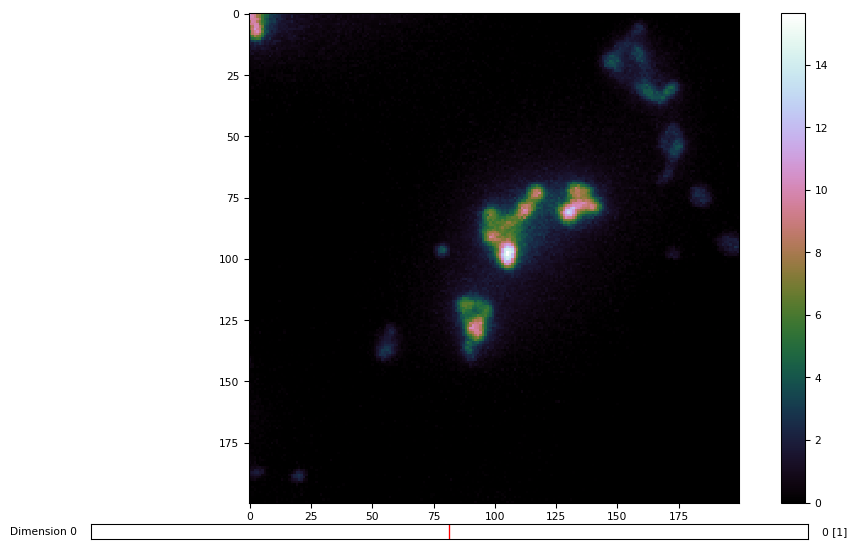

In [29]:
tiff.imshow(x[1])

In [21]:
np.mean(x[1])

0.29453108

In [22]:
trn_xs ,trn_ys = next(iter(data.trn_dl))

/home/user/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x7f20ff7e1208>)

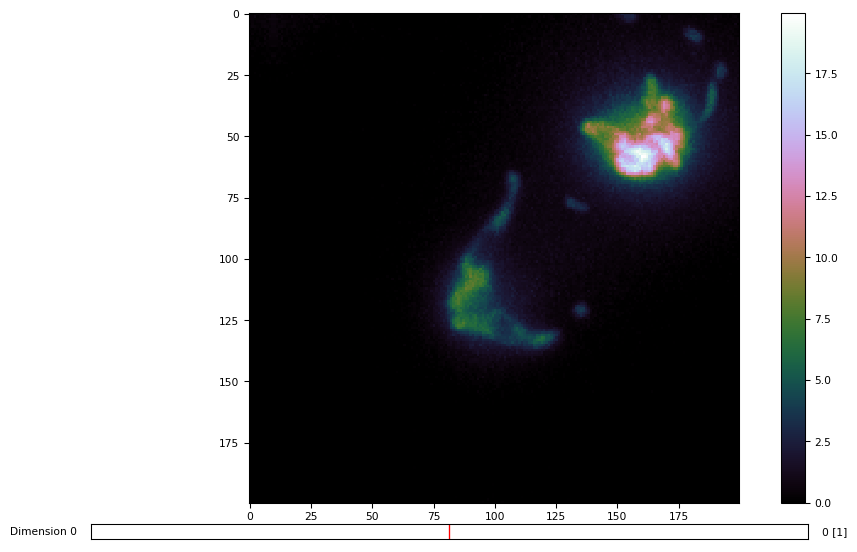

In [26]:
idx = 21
trn_x = trn_xs[idx].cpu().numpy().copy()
trn_y = trn_ys[idx]
tiff.imshow(trn_x[1])

In [24]:
trn_y

3